In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

: 

In [3]:
#load data
results = pd.read_csv('c.csv')

In [4]:
results.head()

,home_team,away_team,home_score,away_score,Total_Shots,Possession,Player_Rating
0,Real Madrid,Ath.Bilbao,3,0,0.726087,0.120522,0.409565
1,Real Madrid,Barcelona,0,1,0.482609,0.117043,0.340000
2,Real Madrid,Ath.Madrid,0,0,0.413043,0.117739,0.340000
3,Real Madrid,Valencia,2,0,0.691304,0.120522,0.360870
4,Real Madrid,Sevilla,2,0,0.795652,0.121217,0.371304


In [5]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results.head()

,home_team,away_team,home_score,away_score,Total_Shots,Possession,Player_Rating,winning_team,goal_difference
0,Real Madrid,Ath.Bilbao,3,0,0.726087,0.120522,0.409565,Real Madrid,3
1,Real Madrid,Barcelona,0,1,0.482609,0.117043,0.340000,Barcelona,1
2,Real Madrid,Ath.Madrid,0,0,0.413043,0.117739,0.340000,Draw,0
3,Real Madrid,Valencia,2,0,0.691304,0.120522,0.360870,Real Madrid,2
4,Real Madrid,Sevilla,2,0,0.795652,0.121217,0.371304,Real Madrid,2


In [6]:
df = results[(results['home_team'] == 'Barcelona') | (results['away_team'] == 'Barcelona')]
Barcelona = df.iloc[:]
Barcelona.head()

,home_team,away_team,home_score,away_score,Total_Shots,Possession,Player_Rating,winning_team,goal_difference
1,Real Madrid,Barcelona,0,1,0.482609,0.117043,0.340000,Barcelona,1
10,Barcelona,Real Madrid,5,1,0.447826,0.116348,0.326087,Barcelona,4
18,Barcelona,Ath.Bilbao,1,1,0.691304,0.118435,0.360870,Draw,0
19,Barcelona,Ath.Madrid,2,0,0.552174,0.120870,0.395652,Barcelona,2
20,Barcelona,Valencia,2,2,0.691304,0.120174,0.360870,Draw,0


<AxesSubplot:xlabel='Barcelona_Results', ylabel='count'>

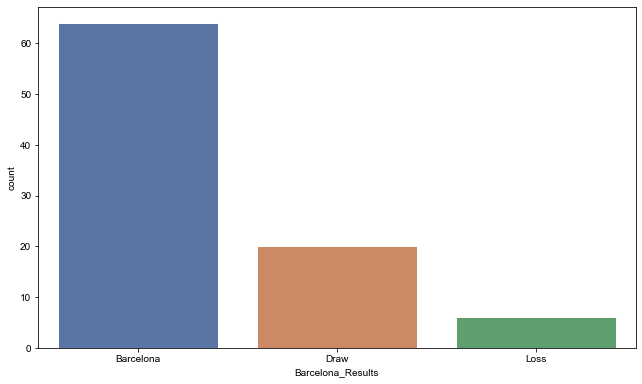

In [7]:
wins = []
for row in Barcelona['winning_team']:
    if row != 'Barcelona' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'Barcelona_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Barcelona_Results', data=winsdf)

In [8]:
# wins is a good metric to analyze and predict outcomes of matches in the tournament 
#tournament and venue won't add much to our predictions
#historical match records will be used 


In [9]:
#narrowing to team patcipating in the world cup
laliga_teams = ['Ath.Bilbao','Barcelona','Ath.Madrid','Valencia','Sevilla','Espanyol','Real Sociedad','Villareal','Eibar','Real Madrid']
df_teams_home = results[results['home_team'].isin(laliga_teams)]
df_teams_away = results[results['away_team'].isin(laliga_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

home_team          900
away_team          900
home_score         900
away_score         900
Total_Shots        900
Possession         900
Player_Rating      900
winning_team       900
goal_difference    900
dtype: int64

In [10]:
df_teams.head()

,home_team,away_team,home_score,away_score,Total_Shots,Possession,Player_Rating,winning_team,goal_difference
0,Real Madrid,Ath.Bilbao,3,0,0.726087,0.120522,0.409565,Real Madrid,3
1,Real Madrid,Barcelona,0,1,0.482609,0.117043,0.340000,Barcelona,1
2,Real Madrid,Ath.Madrid,0,0,0.413043,0.117739,0.340000,Draw,0
3,Real Madrid,Valencia,2,0,0.691304,0.120522,0.360870,Real Madrid,2
4,Real Madrid,Sevilla,2,0,0.795652,0.121217,0.371304,Real Madrid,2


In [11]:
#dropping columns that wll not affect matchoutcomes
df_teams = df_teams.drop(['home_score', 'away_score','goal_difference'], axis=1)
df_teams.head()

,home_team,away_team,Total_Shots,Possession,Player_Rating,winning_team
0,Real Madrid,Ath.Bilbao,0.726087,0.120522,0.409565,Real Madrid
1,Real Madrid,Barcelona,0.482609,0.117043,0.340000,Barcelona
2,Real Madrid,Ath.Madrid,0.413043,0.117739,0.340000,Draw
3,Real Madrid,Valencia,0.691304,0.120522,0.360870,Real Madrid
4,Real Madrid,Sevilla,0.795652,0.121217,0.371304,Real Madrid


In [12]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams = df_teams.reset_index(drop=True)
df_teams.loc[df_teams.winning_team == df_teams.home_team,'winning_team']=2
df_teams.loc[df_teams.winning_team == 'Draw', 'winning_team']=1
df_teams.loc[df_teams.winning_team == df_teams.away_team, 'winning_team']=0

df_teams.head()

,home_team,away_team,Total_Shots,Possession,Player_Rating,winning_team
0,Real Madrid,Ath.Bilbao,0.726087,0.120522,0.409565,2
1,Real Madrid,Barcelona,0.482609,0.117043,0.340000,0
2,Real Madrid,Ath.Madrid,0.413043,0.117739,0.340000,1
3,Real Madrid,Valencia,0.691304,0.120522,0.360870,2
4,Real Madrid,Sevilla,0.795652,0.121217,0.371304,2


In [13]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [14]:
final.head()

,Total_Shots,Possession,Player_Rating,winning_team,home_team_Ath.Bilbao,home_team_Ath.Madrid,home_team_Barcelona,home_team_Eibar,home_team_Espanyol,home_team_Real Madrid,...,away_team_Ath.Bilbao,away_team_Ath.Madrid,away_team_Barcelona,away_team_Eibar,away_team_Espanyol,away_team_Real Madrid,away_team_Real Sociedad,away_team_Sevilla,away_team_Valencia,away_team_Villareal
0,0.726087,0.120522,0.409565,2,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,0.482609,0.117043,0.340000,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0.413043,0.117739,0.340000,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.691304,0.120522,0.360870,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0.795652,0.121217,0.371304,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


## LOGISTIC REGRESSION

In [31]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
pp=logreg.predict(X_test)
hist = logreg.score(X_train, y_train,)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(hist))
print("Test set accuracy: ", '%.3f'%(score2))
acc0=accuracy_score(pp,y_test)
acc0

Training set accuracy:  0.565
Test set accuracy:  0.563


0.562962962962963

## Random Forest

In [32]:
meow = RandomForestClassifier()
meow.fit(X_train, y_train)
predictions = meow.predict(X_test)
from sklearn.metrics import accuracy_score
acc1=accuracy_score(predictions,y_test)
acc1

0.8407407407407408

## SVM

In [33]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train, y_train)


predict = model.predict(X_test)

acc2=accuracy_score(predict,y_test)
acc2

0.5518518518518518

## KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)


predict1 = model1.predict(X_test)
acc3=accuracy_score(predict1,y_test)
acc3

0.5444444444444444

## ADABOOST

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_classifier = DecisionTreeClassifier(max_depth=1)

# Create and train the AdaBoost model
model2 = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=100)
model2.fit(X_train, y_train)

# Use the model to make predictions
predict2 = model2.predict(X_test)
acc4=accuracy_score(predict2,y_test)
acc4

0.5444444444444444

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
acc5=accuracy_score(dtcpred,y_test)
acc5

0.8629629629629629

## DTC HAS THE BEST ACCURACY SO WE PROCEED WITH IT 


In [ ]:
#adding Fifa rankings

# Loading new datasets
ranking = pd.read_csv('rank.csv') 
fixtures = pd.read_csv('fix.csv')
fixtures=pd.DataFrame( [['Ath.Bilbao','Ath.Madrid',None ],
                             ],columns=fixtures.columns)

# List for storing the group stage games
pred_set = []

In [21]:
# Create new columns with ranking position of each team
fixtures.insert(1, 'first_position', fixtures['Home Team'].map(ranking.set_index('Team')['Position']))
fixtures.insert(2, 'second_position', fixtures['Away Team'].map(ranking.set_index('Team')['Position']))

# We only need the group stage games, so we have to slice the dataset
fixtures = fixtures.iloc[:48, :]
fixtures.tail()

,Home Team,first_position,second_position,Away Team,Result
0,Ath.Bilbao,10,3,Ath.Madrid,None


In [22]:
# Loop to add teams to new prediction dataset based on the ranking position of each team
for index, row in fixtures.iterrows():
    if row['first_position'] < row['second_position']:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
    else:
        pred_set.append({'home_team': row['Home Team'], 'away_team': row['Away Team'], 'winning_team': None})
        
pred_set = pd.DataFrame(pred_set)
backup_pred_set = pred_set

pred_set

,home_team,away_team,winning_team
0,Ath.Bilbao,Ath.Madrid,None


In [23]:
type(pred_set)

pandas.core.frame.DataFrame

In [24]:
# Get dummy variables and drop winning_team column
pred_set = pd.get_dummies(pred_set, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Add missing columns compared to the model's training dataset
missing_cols = set(final.columns) - set(pred_set.columns)
for c in missing_cols:
    pred_set[c] = 0
pred_set = pred_set[final.columns]

# Remove winning team column
pred_set = pred_set.drop(['winning_team'], axis=1)

pred_set.head()

,Total_Shots,Possession,Player_Rating,home_team_Ath.Bilbao,home_team_Ath.Madrid,home_team_Barcelona,home_team_Eibar,home_team_Espanyol,home_team_Real Madrid,home_team_Real Sociedad,...,away_team_Ath.Bilbao,away_team_Ath.Madrid,away_team_Barcelona,away_team_Eibar,away_team_Espanyol,away_team_Real Madrid,away_team_Real Sociedad,away_team_Sevilla,away_team_Valencia,away_team_Villareal
0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [25]:
pred_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Total_Shots              1 non-null      int64
 1   Possession               1 non-null      int64
 2   Player_Rating            1 non-null      int64
 3   home_team_Ath.Bilbao     1 non-null      uint8
 4   home_team_Ath.Madrid     1 non-null      int64
 5   home_team_Barcelona      1 non-null      int64
 6   home_team_Eibar          1 non-null      int64
 7   home_team_Espanyol       1 non-null      int64
 8   home_team_Real Madrid    1 non-null      int64
 9   home_team_Real Sociedad  1 non-null      int64
 10  home_team_Sevilla        1 non-null      int64
 11  home_team_Valencia       1 non-null      int64
 12  home_team_Villareal      1 non-null      int64
 13  away_team_Ath.Bilbao     1 non-null      int64
 14  away_team_Ath.Madrid     1 non-null      uint8
 15  away_team_

In [26]:
## PREDICTING USING LOGISTIC REGRESSION

def predictwin(my_dic):
    print(my_dic)
    def win_loss(predictions):
        if predictions == 2:
            return "Winner: " + my_dic['home_team']
        elif predictions == 1:
            return "Draw"
        elif predictions == 0:
            return "Winner: " + my_dic['away_team']
    dpred = pd.DataFrame(my_dic, index = [0])
    # Get dummy variables and drop winning_team column
    dpred = pd.get_dummies(dpred, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
    
    # Add missing columns compared to the model's training dataset
    missing_cols = set(final.columns) - set(dpred.columns)
    for c in missing_cols:
        dpred[c] = 0
    dpred = dpred[final.columns]
    
    # Remove winning team column
    dpred = dpred.drop(['winning_team'], axis=1)
    #group matches
    predictions = logreg.predict(dpred)
    match = my_dic['home_team'] + " vs " + my_dic['away_team']
    winner = win_loss(predictions)

    pwin_home = ' Probability of ' + my_dic['home_team'] + ' winning: ''%.3f'%((logreg.predict_proba(dpred)[0][2])*100)+'%'
    pdraw = 'Probability of match Draw: ' '%.3f'%((logreg.predict_proba(dpred)[0][1])*100)+'%'
    pwin_away = ' Probability of ' + my_dic['away_team'] + ' winning: ' '%.3f'%((logreg.predict_proba(dpred)[0][0])*100)+'%'
    my_new_dic = {'match':match, 'winner':winner,'pwin_home':pwin_home, 'pdraw':pdraw,'pwin_away':pwin_away}
    return my_new_dic

In [27]:
## PREDICTING USING RFC
def predictwin(my_dic):
    print(my_dic)
    def win_loss(predictions):
        if predictions == 2:
            return "Winner: " + my_dic['home_team']
        elif predictions == 1:
            return "Draw"
        elif predictions == 0:
            return "Winner: " + my_dic['away_team']
    dpred = pd.DataFrame(my_dic, index = [0])
    # Get dummy variables and drop winning_team column
    dpred = pd.get_dummies(dpred, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
    
    # Add missing columns compared to the model's training dataset
    missing_cols = set(final.columns) - set(dpred.columns)
    for c in missing_cols:
        dpred[c] = 0
    dpred = dpred[final.columns]
    
    # Remove winning team column
    dpred = dpred.drop(['winning_team'], axis=1)
    #group matches
    predictions = meow.predict(dpred)
    match = my_dic['home_team'] + " vs " + my_dic['away_team']
    winner = win_loss(predictions)

    pwin_home = ' Probability of ' + my_dic['home_team'] + ' winning: ''%.3f'%((meow.predict_proba(dpred)[0][2])*100)+'%'
    pdraw = 'Probability of match Draw: ' '%.3f'%((logreg.predict_proba(dpred)[0][1])*100)+'%'
    pwin_away = ' Probability of ' + my_dic['away_team'] + ' winning: ' '%.3f'%((meow.predict_proba(dpred)[0][0])*100)+'%'
    my_new_dic = {'match':match, 'winner':winner,'pwin_home':pwin_home, 'pdraw':pdraw,'pwin_away':pwin_away}
    return my_new_dic

In [40]:
## PREDICTING USING dtc
def predictwin(my_dic):
    print(my_dic)
    def win_loss(predictions):
        if predictions == 2:
            return "Winner: " + my_dic['home_team']
        elif predictions == 1:
            return "Draw"
        elif predictions == 0:
            return "Winner: " + my_dic['away_team']
    dpred = pd.DataFrame(my_dic, index = [0])
    # Get dummy variables and drop winning_team column
    dpred = pd.get_dummies(dpred, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
    
    # Add missing columns compared to the model's training dataset
    missing_cols = set(final.columns) - set(dpred.columns)
    for c in missing_cols:
        dpred[c] = 0
    dpred = dpred[final.columns]
    
    # Remove winning team column
    dpred = dpred.drop(['winning_team'], axis=1)
    #group matches
    predictions = dtc.predict(dpred)
    match = my_dic['home_team'] + " vs " + my_dic['away_team']
    winner = win_loss(predictions)

    pwin_home = ' Probability of ' + my_dic['home_team'] + ' winning: ''%.3f'%((dtc.predict_proba(dpred)[0][2])*100)+'%'
    pdraw = 'Probability of match Draw: ' '%.3f'%((dtc.predict_proba(dpred)[0][1])*100)+'%'
    pwin_away = ' Probability of ' + my_dic['away_team'] + ' winning: ' '%.3f'%((dtc.predict_proba(dpred)[0][0])*100)+'%'
    my_new_dic = {'match':match, 'winner':winner,'pwin_home':pwin_home, 'pdraw':pdraw,'pwin_away':pwin_away}
    return my_new_dic

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Accuracy of Various Classifiers'}, xlabel='Classifier', ylabel='Accuracy %'>

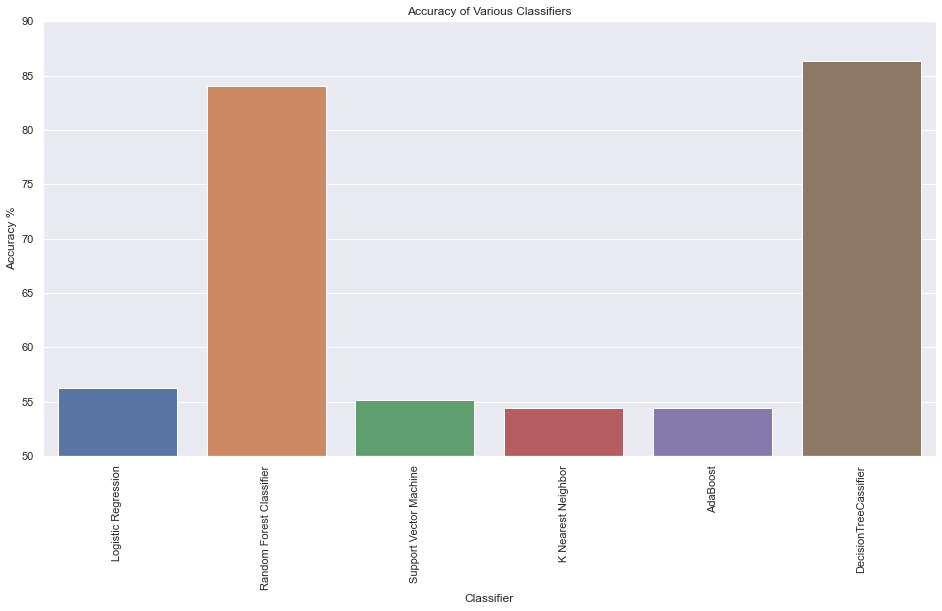

In [42]:
y=[i*100 for i in [acc0,acc1,acc2,acc3,acc4,acc5]]
x=['Logistic Regression','Random Forest Classifier','Support Vector Machine','K Nearest Neighbor','AdaBoost','DecisionTreeCassifier']
plt.figure(figsize = (16,8))
compareAcc=sns.barplot(x,y)
compareAcc.set(title='Accuracy of Various Classifiers',xlabel='Classifier',ylabel='Accuracy %')
plt.xticks(rotation=90)
plt.ylim(50, 90)
compareAcc